In [1]:
# coding: utf-8
import os
import sys

sys.path.append("../예제/")  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

===========iteration:0===========
std=0.01:2.302446911539068
Xavier:2.296228166064738
He:2.2351227812529637
===========iteration:100===========
std=0.01:2.301716667525389
Xavier:2.224454795259228
He:1.3220723139674035
===========iteration:200===========
std=0.01:2.302335889943925
Xavier:2.063731932572964
He:0.7871187912132156
===========iteration:300===========
std=0.01:2.298367977266503
Xavier:1.7717793080591522
He:0.5687538074609217
===========iteration:400===========
std=0.01:2.3018986592949933
Xavier:1.2889255767531917
He:0.3686233604885207
===========iteration:500===========
std=0.01:2.3019153089773203
Xavier:0.870797211065142
He:0.33675337659599913
===========iteration:600===========
std=0.01:2.2982809852122688
Xavier:0.6400427895633491
He:0.35954347587823443
===========iteration:700===========
std=0.01:2.301253579994567
Xavier:0.530444262139494
He:0.20809834468366198
===========iteration:800===========
std=0.01:2.2999502104065384
Xavier:0.4806715787064147
He:0.29004962809531043


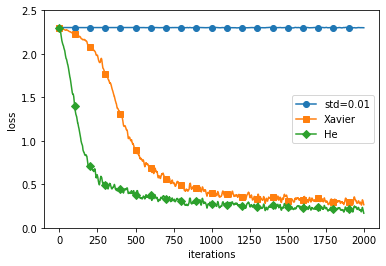

In [2]:
# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()
